In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
df = pd.read_csv("temperatures.csv")

In [66]:
df.shape

(117, 18)

In [67]:
df.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [68]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


In [69]:
df.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
YEAR,1.000000,0.575499,0.647066,0.553886,0.540662,0.407648,0.371840,0.478512,0.654138,0.664008,0.589073,0.697887,0.732222,0.801129,0.679869,0.640438,0.677061,0.749792
JAN,0.575499,1.000000,0.647017,0.457081,0.594674,0.365236,0.292855,0.339337,0.459944,0.499764,0.480695,0.526615,0.595902,0.749880,0.874226,0.575734,0.496515,0.607752
FEB,0.647066,0.647017,1.000000,0.589088,0.548803,0.377722,0.341302,0.418956,0.503188,0.472755,0.466916,0.519595,0.619320,0.792541,0.928731,0.635904,0.544527,0.609839
MAR,0.553886,0.457081,0.589088,1.000000,0.618621,0.387756,0.228349,0.232647,0.382344,0.370066,0.312226,0.498202,0.523316,0.689205,0.584612,0.848637,0.380640,0.505879
APR,0.540662,0.594674,0.548803,0.618621,1.000000,0.563317,0.299866,0.286052,0.490668,0.437970,0.473873,0.538037,0.579775,0.770596,0.643942,0.878402,0.474542,0.596943
MAY,0.407648,0.365236,0.377722,0.387756,0.563317,1.000000,0.274521,0.299072,0.473171,0.347289,0.468993,0.482822,0.444695,0.609015,0.403316,0.708221,0.431314,0.503445
JUN,0.371840,0.292855,0.341302,0.228349,0.299866,0.274521,1.000000,0.480925,0.504354,0.305761,0.380782,0.419968,0.366242,0.520189,0.351115,0.341301,0.749132,0.409325
JUL,0.478512,0.339337,0.418956,0.232647,0.286052,0.299072,0.480925,1.000000,0.622985,0.531865,0.568341,0.535413,0.440813,0.588454,0.423876,0.321388,0.799602,0.541023
AUG,0.654138,0.459944,0.503188,0.382344,0.490668,0.473171,0.504354,0.622985,1.000000,0.680212,0.661177,0.588961,0.595330,0.755384,0.534818,0.560118,0.866202,0.665040
SEP,0.664008,0.499764,0.472755,0.370066,0.437970,0.347289,0.305761,0.531865,0.680212,1.000000,0.680744,0.683866,0.629223,0.730756,0.529533,0.485397,0.778875,0.734650


In [70]:
df.corr()["YEAR"].sort_values(ascending=False)

YEAR       1.000000
ANNUAL     0.801129
OCT-DEC    0.749792
DEC        0.732222
NOV        0.697887
JAN-FEB    0.679869
JUN-SEP    0.677061
SEP        0.664008
AUG        0.654138
FEB        0.647066
MAR-MAY    0.640438
OCT        0.589073
JAN        0.575499
MAR        0.553886
APR        0.540662
JUL        0.478512
MAY        0.407648
JUN        0.371840
Name: YEAR, dtype: float64

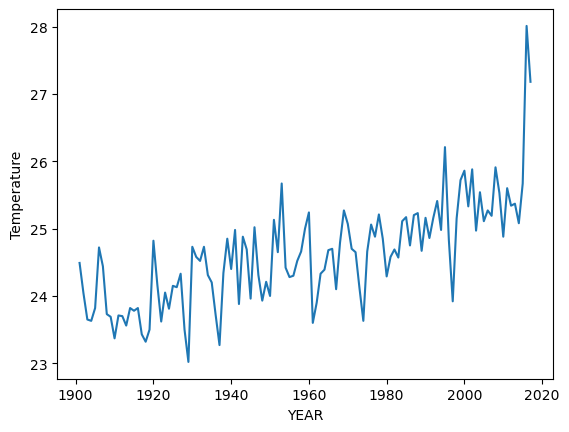

In [71]:
# Highly Correlated (Dec)

plt.plot(df['YEAR'], df['DEC'])
plt.xlabel("YEAR")
plt.ylabel("Temperature")
plt.show()

In [72]:
x = df[["YEAR"]]
y = df[["DEC"]]

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [74]:
print("Highly correlated")
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Highly correlated
(87, 1)
(30, 1)
(87, 1)
(30, 1)


In [75]:
model_h = LinearRegression()
model_h.fit(x_train,y_train)

LinearRegression()

In [76]:
train_predicted = model_h.predict(x_train)
test_predicted = model_h.predict(x_test)

In [77]:
train_sse = np.sum((train_predicted - y_train)**2, axis = 0)
train_sse

DEC    25.708982
dtype: float64

In [78]:
test_sse = np.sum((test_predicted - y_test)**2, axis = 0)
test_sse

DEC    7.433688
dtype: float64

In [79]:
mae = mean_absolute_error(y_train, train_predicted)
mae

0.390804972697165

Text(0, 0.5, 'Temperature')

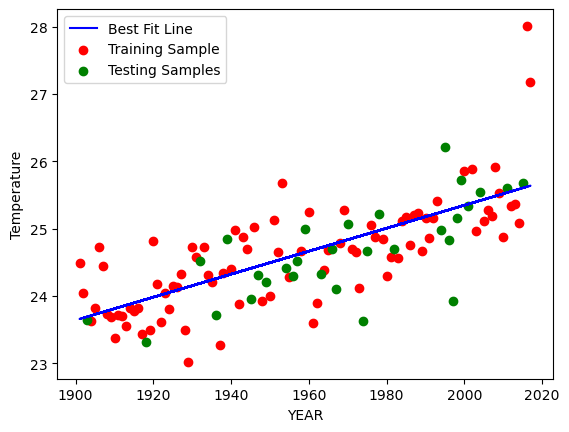

In [80]:
plt.plot(x_train, train_predicted, c = 'b')
plt.scatter(x_train, y_train, c = 'r')
plt.scatter(x_test, y_test, c = 'g')
plt.legend(["Best Fit Line", "Training Sample", "Testing Samples"])
plt.xlabel("YEAR")
plt.ylabel("Temperature")

In [81]:
train_sse = []
test_sse = []

tr_size = 0.1

while tr_size <= 0.9:
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = tr_size, random_state=1)
    
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    
    pred_train = mod.predict(x_train)
    pred_test = mod.predict(x_test)
    
    tr_sse = np.sum((pred_train - y_train)**2, axis = 0)
    te_sse = np.sum((pred_test - y_test)**2, axis = 0)
    
    train_sse.append(tr_sse)
    test_sse.append(te_sse)
    
    tr_size += 0.1

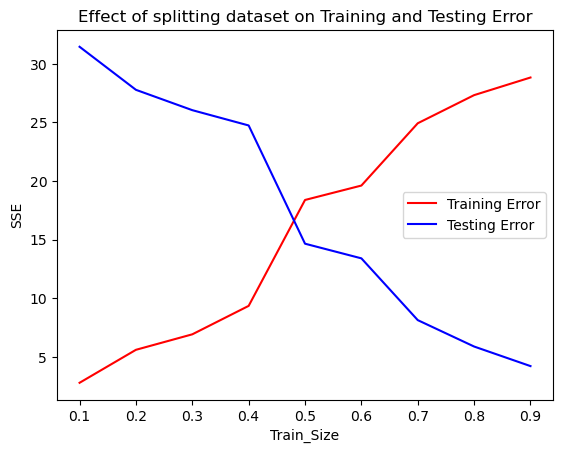

In [82]:
trainSize = []
for i in range(1, 10):
    trainSize.append(i/10)

plt.title("Effect of splitting dataset on Training and Testing Error")
plt.plot(trainSize, np.array(train_sse), c = 'r')
plt.plot(trainSize, np.array(test_sse), c = 'b')

plt.xlabel("Train_Size")
plt.ylabel("SSE")

plt.legend(["Training Error", "Testing Error"])